# Numerical analysis

In [1]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
def eps_fock(nmax, r):
    return 1 - (1/np.cosh(r))*sum([((np.tanh(r)**2)/4)**k*factorial(2*k)/(factorial(k)**2) for k in range(nmax//2 + 1)])

In [3]:
eps_focks = [eps_fock(nmax, np.log(2)) for nmax in np.arange(12)]
np.save('eps_focks.npy', eps_focks)

In [4]:
def eps_sq(nmax, r):
    return ((np.cosh(r) - 1)/(np.cosh(r) + 1))**(nmax + 1)

In [5]:
eps_sqs = [eps_sq(nmax, np.log(2)) for nmax in np.arange(12)]
np.save('eps_sqs.npy', eps_sqs)

In [7]:
SINGLE_COL_WIDTH = 3.4039 #INCHES
DOUBLE_COL_WIDTH = 7.0569 #INCHES 

SMALL_SIZE = 6.5
MEDIUM_SIZE = 8.5
BIGGER_SIZE = 10.5

plt.rc('text', usetex=False)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines',linewidth=0.75)
#plt.rcParams['ytick.major.pad']='0.5'

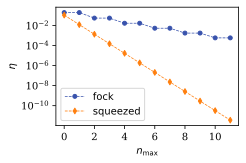

In [18]:
with plt.style.context('paper.mplstyle'):
    fig, ax = plt.subplots(figsize=(SINGLE_COL_WIDTH, (2 / 3) * SINGLE_COL_WIDTH))
    ax.semilogy(eps_focks, linestyle='--', marker='o', ms=4, label='fock', color='#3852AC')
    ax.semilogy(eps_sqs, linestyle='--', marker='d', ms=4, label='squeezed', color='#FF7F0E')
    ax.set_xlabel(r'$n_\mathrm{max}$')
    ax.set_ylabel(r'$\eta$')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend(prop=dict(family='sans'))
    plt.tight_layout()
    plt.savefig('discarded-population.pdf', bbox_inches='tight', pad_inches=0.02)